# ÖDEV 1: PCA yardımı ile Classification,

Bu ödevde "Credit Risk Prediction" veri setini kullanacağız. Amacımız, verinin boyut sayısını düşürerek olabildiğince yüksek accuracy değerini alabilmek. Aşağıda verinin okunma ve temizlenme kısmını hazırlayıp vereceğim. Devamında ise yapmanız gerekenler:

1. PCA kullanarak verinin boyutunu düşürmek
    * Önce explained varience ratio değerini inceleyerek veriyi kaç boyuta düşürebileceğini kontrol et.
    * Daha sonra farklı boyutlarda denemeler yaparak boyutu düşürülmüş verileri elde et.
2. Classification modellerini dene
    * Logistic Regression
    * Random Forest
    * ve eğer istersen herhangi bir modelle daha

İsteğe bağlı olarak, verinin boyutunu düşürmek için diğer yöntemleri de kullanıp en yüksek accuracy değerini almayı deneyebilirsin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df: pd.DataFrame = pd.read_csv('./credit_risk_dataset.csv')

In [3]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [4]:
# Null değerleri sütun ortalaması ile dolduruyoruz
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [5]:
df.duplicated().sum()

165

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,32416.0,4.768880,4.090411,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.014662,3.083050,5.42,8.49,10.99,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [8]:
# Outlier temizliği
df = df[df['person_age']<=100]
df = df[df['person_emp_length'] <= 60]
df = df[df['person_income']<=4e6]

In [9]:
# Kategorik verileri alıyoruz ve one hot encoding haline getiriyoruz
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [10]:
encoded_cat_cols = pd.get_dummies(cat_cols)
df.drop(df.select_dtypes(include=['object']).columns, axis=1,inplace=True)
df = pd.concat([df,encoded_cat_cols], axis=1)

In [11]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values


In [12]:
# Verileri train ve test olarak ikiye ayırıyoruz

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]


_Sklearn Kütüphanesinin Decomposition modülünden PCA import Ediyoruz_


In [13]:
from sklearn.decomposition import PCA
pca = PCA() #components vermiyoruz tüm ratio değerlerini görebilmek için.
xD_train = pca.fit(train_x)
pca.components_

array([[ 1.65280794e-05,  9.99267506e-01,  1.18367356e-05,
         3.82681402e-02, -7.17659245e-08, -5.91935302e-07,
         9.51225022e-06,  2.21374548e-06,  1.45147546e-08,
        -2.39757640e-07, -1.98850259e-06,  1.94202186e-08,
        -1.30265658e-07,  3.11122611e-07, -2.83837224e-07,
         5.96245243e-08,  2.39355280e-08,  9.12358366e-08,
         3.50288430e-08, -1.22129559e-07, -8.23001095e-08,
         4.81752118e-08,  2.46218526e-08,  5.36792459e-09,
         1.33508740e-08, -1.33508740e-08],
       [-3.48333106e-06,  3.82681406e-02, -4.38910020e-05,
        -9.99267502e-01, -7.62436499e-05, -1.25516182e-05,
        -2.65852495e-07, -4.84040228e-06, -1.04837485e-07,
         6.26276686e-07,  4.31896308e-06,  1.55289126e-07,
         3.33172805e-07, -1.60774251e-06,  8.85707313e-07,
         2.00713973e-07,  3.28592922e-08,  9.95621988e-06,
        -3.43333238e-06,  1.69298895e-06, -4.24220848e-06,
        -2.57305353e-06, -9.77069833e-07, -4.23544606e-07,
         2.80

In [14]:
x_train_radio=np.cumsum(pca.explained_variance_ratio_)

<function matplotlib.pyplot.show(close=None, block=None)>

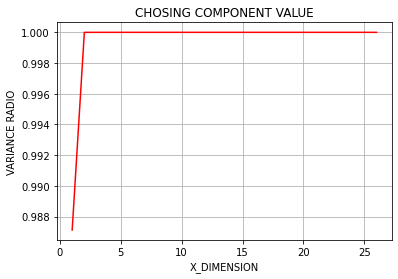

In [15]:
x_dimension = np.arange(1,len(x_train_radio)+1)
plt.title('CHOSING COMPONENT VALUE')
plt.xlabel('X_DIMENSION')
plt.ylabel('VARIANCE RADIO')
plt.grid()
plt.plot(x_dimension,x_train_radio,color='red')
plt.show

_GRAFİĞE BAKILIRSA 3 DIMENSİONDAN SONRA SABİTLENİYOR BU YÜZDEN 'n_component = 3' SEÇEREK FİT EDECEĞİZ_


In [16]:
pca = PCA(n_components=1)
X3_train = pca.fit_transform(train_x)
X3_test = pca.fit_transform(test_x)

print(test_y.shape)
print('*******************')
(X3_train.shape) , X3_test.shape

(3241,)
*******************


((29168, 1), (3241, 1))

*Veri Kaybı:*

In [17]:
1 - pca.explained_variance_ratio_.sum()

0.012440205733564857

# Logistic Regession Modeli

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


              precision    recall  f1-score   support

           0       0.89      0.42      0.57      2532
           1       0.28      0.81      0.42       709

    accuracy                           0.51      3241
   macro avg       0.59      0.62      0.50      3241
weighted avg       0.76      0.51      0.54      3241



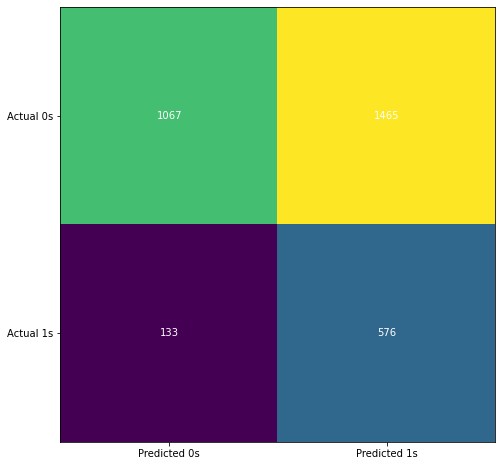

In [19]:
LR = LogisticRegression(fit_intercept=True)
LR.fit(X3_train,train_y)
predict_y = LR.predict(X3_test)
#Model Scores
print(classification_report(test_y,predict_y))

#Model confusion matrix
cm = confusion_matrix(test_y, predict_y)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree


              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2532
           1       0.46      0.22      0.30       709

    accuracy                           0.77      3241
   macro avg       0.63      0.57      0.58      3241
weighted avg       0.73      0.77      0.74      3241



[Text(0.47708333333333336, 0.9166666666666666, 'X[0] <= -31121.848\ngini = 0.342\nsamples = 18496\nvalue = [22771, 6397]'),
 Text(0.22083333333333333, 0.75, 'X[0] <= -46130.209\ngini = 0.496\nsamples = 3473\nvalue = [3008, 2497]'),
 Text(0.10833333333333334, 0.5833333333333334, 'X[0] <= -48042.211\ngini = 0.329\nsamples = 582\nvalue = [193, 738]'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[0] <= -49902.666\ngini = 0.365\nsamples = 422\nvalue = [165, 521]'),
 Text(0.03333333333333333, 0.25, 'X[0] <= -51704.631\ngini = 0.302\nsamples = 324\nvalue = [97, 427]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.241\nsamples = 178\nvalue = [42, 257]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.369\nsamples = 146\nvalue = [55, 170]'),
 Text(0.1, 0.25, 'X[0] <= -48084.307\ngini = 0.487\nsamples = 98\nvalue = [68, 94]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.468\nsamples = 83\nvalue = [52, 87]'),
 Text(0.11666666666666667, 0.08333333333333333, 'gini = 0.4

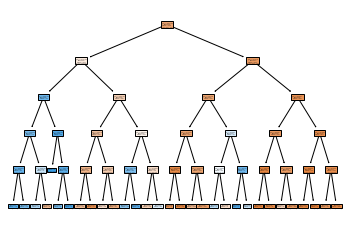

In [34]:
RF = RandomForestClassifier(n_estimators=100,max_depth=5)
RF.fit(X3_train,train_y)
predict_y = RF.predict(X3_test)
#model scores
print(classification_report(test_y,predict_y))

#plot tree
estimator = RF.estimators_[5]
tree.plot_tree(estimator,filled=True)

# PCA components sayısı değiştirerek model eğitimleri yapma: 

In [37]:
pca1 = PCA(n_components=15)
X15_train = pca1.fit_transform(train_x)
X15_test = pca1.fit_transform(test_x)

print(train_y.shape)
print('*******************')
(X15_train.shape) , X15_test.shape

(29168,)
*******************


((29168, 15), (3241, 15))

_Veri kaybı:_ 

In [38]:
1 - pca1.explained_variance_ratio_.sum()

6.827383103313878e-11

# Logistic Regession

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2532
           1       0.72      0.36      0.48       709

    accuracy                           0.83      3241
   macro avg       0.78      0.66      0.69      3241
weighted avg       0.81      0.83      0.81      3241



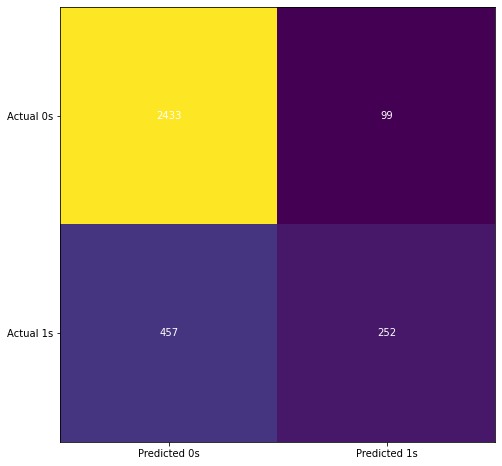

In [40]:
LR = LogisticRegression(fit_intercept=True)
LR.fit(X15_train,train_y)
predict_y = LR.predict(X15_test)
#Model Scores
print(classification_report(test_y,predict_y))

#Model confusion matrix
cm = confusion_matrix(test_y, predict_y)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2532
           1       0.84      0.39      0.54       709

    accuracy                           0.85      3241
   macro avg       0.85      0.69      0.72      3241
weighted avg       0.85      0.85      0.83      3241



[Text(0.4895833333333333, 0.9166666666666666, 'X[0] <= -31122.059\ngini = 0.343\nsamples = 18504\nvalue = [22766, 6402]'),
 Text(0.24583333333333332, 0.75, 'X[0] <= -46137.863\ngini = 0.494\nsamples = 3485\nvalue = [3073, 2478]'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[14] <= 0.07\ngini = 0.318\nsamples = 591\nvalue = [180, 728]'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[6] <= -1.111\ngini = 0.352\nsamples = 484\nvalue = [169, 572]'),
 Text(0.03333333333333333, 0.25, 'X[4] <= 2.566\ngini = 0.444\nsamples = 10\nvalue = [10, 5]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [7, 0]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.469\nsamples = 6\nvalue = [3, 5]'),
 Text(0.1, 0.25, 'X[14] <= -0.094\ngini = 0.342\nsamples = 474\nvalue = [159, 567]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.237\nsamples = 233\nvalue = [50, 314]'),
 Text(0.11666666666666667, 0.08333333333333333, 'gini = 0.421\nsamples = 241\nvalue = [

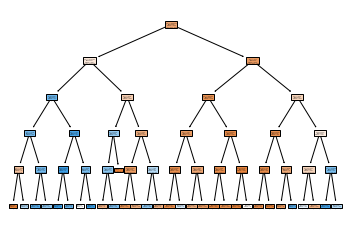

In [41]:
RF = RandomForestClassifier(n_estimators=100,max_depth=5)
RF.fit(X15_train,train_y)
predict_y15 = RF.predict(X15_test)
#model scores
print(classification_report(test_y,predict_y15))

#plot tree
estimator = RF.estimators_[5]
tree.plot_tree(estimator,filled=True)